# Solutions
1. [Matplotlib Fundamentals](#01.-Matplotlib-Fundamentals)
1. [Matplotlib Basic Plotting](#02.-Matplotlib-Basic-Plotting)
1. [Plotting with Pandas](#03.-Plotting-with-Pandas)
1. [Seaborn](#Seaborn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 01. Matplotlib Fundamentals

### Problem 1
<span  style="color:green; font-size:16px">Use the pyplot **`subplots`** function to create a Figure with two rows and one column. Use **`figsize`** to choose a size for your figure. Assign the Figure, and each Axes to their own variables. Set the face color to whatever you lik. Add a title to the upper right hand corner with the `suptitle` method. Make the title font size 30 and change its color from black. Feel free to change more of the [font properties][1]</span>

[1]: https://matplotlib.org/users/text_props.html

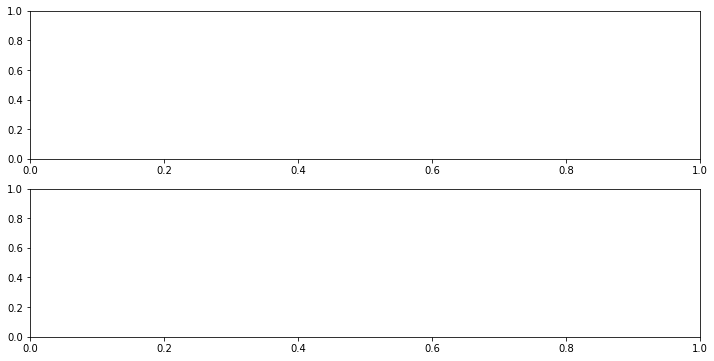

In [2]:
fig, ax_array = plt.subplots(2, 1, figsize=(12, 6))

In [3]:
ax_array.shape

(2,)

In [4]:
ax1 = ax_array[0]
ax2 = ax_array[1]

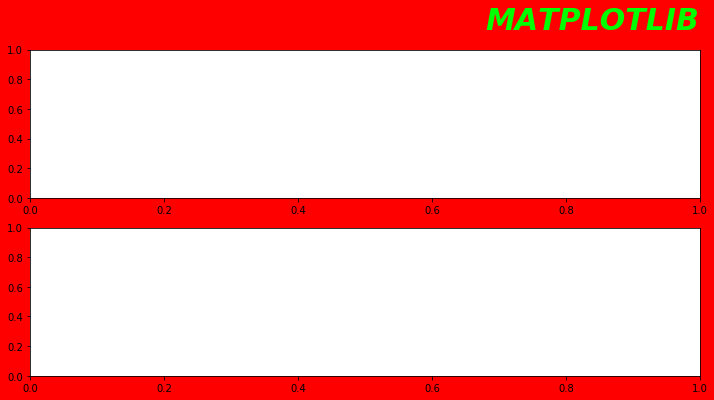

In [5]:
fig.set_facecolor('red')
fig.suptitle('MATPLOTLIB', horizontalalignment='right', x=.9, 
             fontsize=30, color='lime', style='italic', weight='bold')
fig

### Problem 2
<span  style="color:green; font-size:16px">We will be selecting the title we just created in problem 1 and changing its color. Use the `texts` Figure attribute to return a list of Text objects. There should only be one Text object on your plot. Assign it to a variable and call some getter methods on it. Then change the color of it and output the Figure again.</span>

[1]: https://matplotlib.org/users/text_props.html

In [6]:
text = fig.texts[0]

In [7]:
text.get_text()

'MATPLOTLIB'

In [8]:
text.get_color()

'lime'

In [9]:
text.set_color('blue')

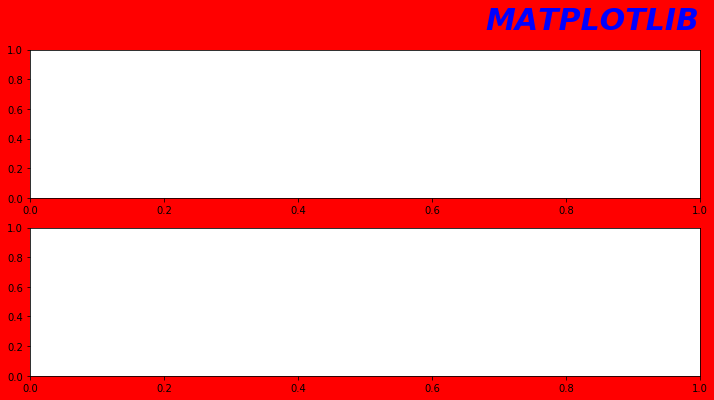

In [10]:
fig

### Problem 3
<span  style="color:green; font-size:16px">Using the figure above, add text to the top Axes labeling it in the top left hand corner. Label the bottom Axes in the bottom right hand corner.</span>

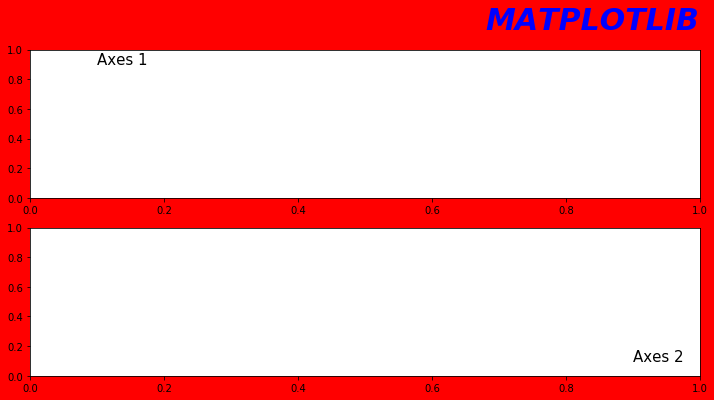

In [11]:
ax1.text(.1, .9, 'Axes 1', fontsize=15)
ax2.text(.9, .1, 'Axes 2', fontsize=15)
fig

### Problem 4
<span  style="color:green; font-size:16px">Change the limits of the x and y axis on the bottom Axes.</span>

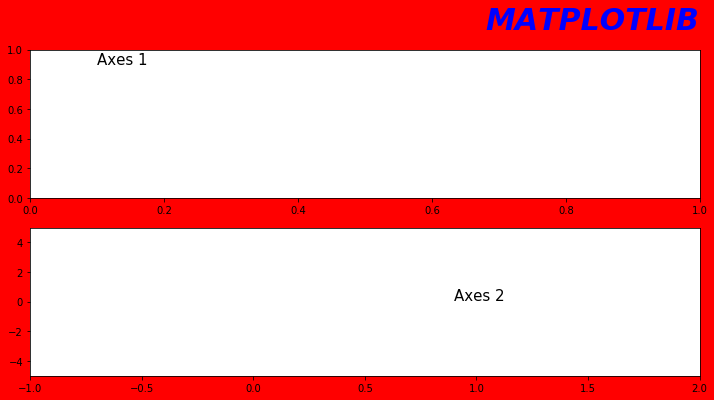

In [12]:
ax2.set_xlim(-1, 2)
ax2.set_ylim(-5, 5)
fig

### Problem 5
<span  style="color:green; font-size:16px">Although you can select each tick mark individually, it is easier to manipulate them as a whole with the `tick_params` Axes method. Read the docs on it and change a few of the properties with it.</span>

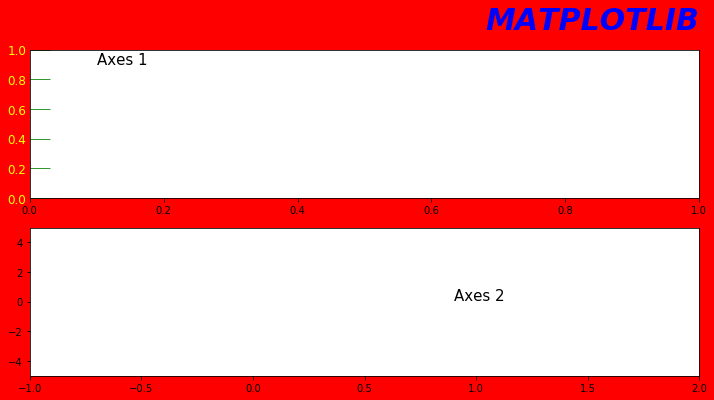

In [13]:
ax1.tick_params(axis='y', direction='in', length=20, color='green', labelsize=12, labelcolor='yellow')
fig

### Problem 6
<span  style="color:green; font-size:16px">Make the x-tick marks appear at just three values.</span>

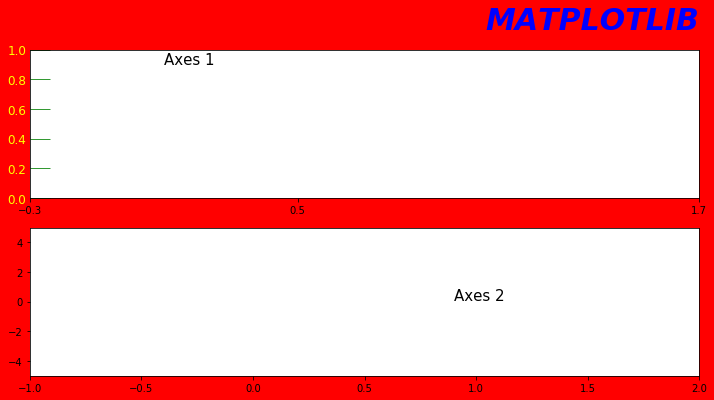

In [14]:
ax1.set_xticks([-.3, .5, 1.7])
fig

## Explore the objects on your Figure
Drill into the plotting objects with the help of tab-completion.

# 02. Matplotlib Basic Plotting

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 1
<span  style="color:green; font-size:16px">Create a Figure with three Axes using **`plt.subplots`**. Use **`np.linspace`** to create a one dimensional array of data from -5 to 5 of length 100 and store this to **`x`**. In each of three Axes, plot take some mathematical function of **`x`** to create **`y`** values in a line plot. For instance, you can take the square root of **`x`**.</span>

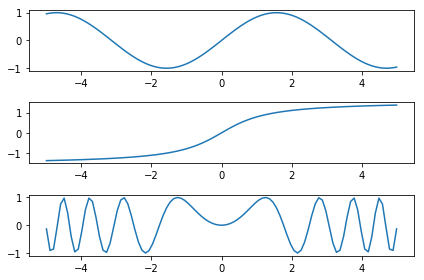

In [16]:
fig, ax_array = plt.subplots(3, 1)
ax1 = ax_array[0]
ax2 = ax_array[1]
ax3 = ax_array[2]
x = np.linspace(-5, 5, 100)
ax1.plot(x, np.sin(x))
ax2.plot(x, np.arctan(x))
ax3.plot(x, np.sin(x ** 2))
fig.tight_layout() # this makes all Axes fit correctly

### Problem 2
<span  style="color:green; font-size:16px">Use **`np.random.rand`** to create two arrays, **`x`** and **`y`** that are each 100 units in length. Make a scatter plot of the data. Make the size of the markers proportional to the ratio of y to x. Make the color proportional to y. For scatter plots, use the parameter **`c`** to control the color with a number. The parameter **`s`** controls the size. Set the title as well.</span>

Text(0.5,1,'Dots')

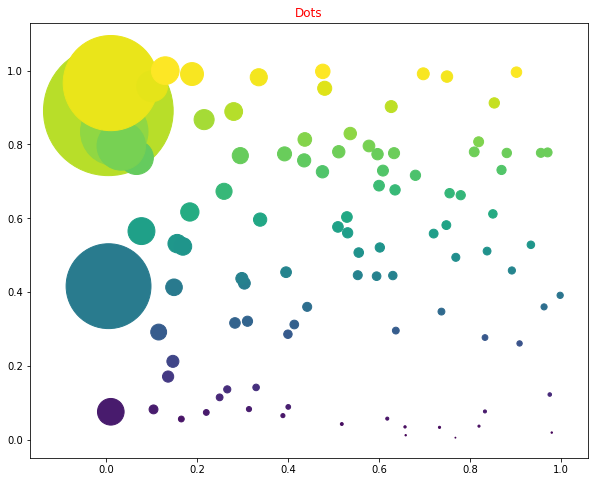

In [17]:
x = np.random.rand(100)
y = np.random.rand(100)

fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(x, y, c=y, s=y / x * 100)
ax.set_title('Dots', color='Red')

### Problem 3
<span  style="color:green; font-size:16px">Read in the college dataset and set the index to the institution name. Complete the following tasks:
* Convert the median earnings within 10 years (MD_EARN_WNE_P10) column to numeric
* Create a column for the total SAT score
* Select just the columns for SAT total, UGDS, RELAFFIL and MD_EARN_WNE_P10 into another DataFrame called `college_samp`. Continue with this DataFrame for the rest of the problem.
* Drop any rows with missing values
* Randomly sample 10% of the DataFrame and assign it back to itself.
* Call the `map` method on the `RELAFFIL` column. Pass it a dictionary to convert the values to color names. Assign the result to the column `color`
* Take the square root of the UGDS column and assign it to the column `size`. 
* Create a scatterplot of the total SAT scores vs the MD_EARN_WNE_P10 column. Color and size each point with their respective columns.
* Extra Credit: Annotate the school with the largest population as it is done [in this example](https://matplotlib.org/users/annotations.html) </span>

In [21]:
college = pd.read_csv("../data/college.csv", index_col='instnm')
college['md_earn_wne_p10'] = pd.to_numeric(college['md_earn_wne_p10'], errors='coerce')
college['sat_total'] = college['satmtmid'] + college['satvrmid']
college_samp = college[['sat_total', 'ugds', 'relaffil', 'md_earn_wne_p10']]
college_samp = college_samp.dropna()
college_samp = college_samp.sample(frac=.1)
college_samp['color'] = college_samp['relaffil'].map({0: 'forestgreen', 1:'violet'})
college_samp['size'] = college_samp['ugds'] ** .5
max_school = college_samp['ugds'].idxmax()
x = college_samp.loc[max_school, 'sat_total']
y = college_samp.loc[max_school, 'md_earn_wne_p10']
college_samp.head()

,sat_total,ugds,relaffil,md_earn_wne_p10,color,size
instnm,,,,,,
The Evergreen State College,1040.0,3802.0,0,32800.0,forestgreen,61.660360
Fayetteville State University,885.0,4862.0,0,30500.0,forestgreen,69.728043
Arkansas Tech University,1030.0,8845.0,0,33800.0,forestgreen,94.047860
Nebraska Wesleyan University,1095.0,1803.0,1,44600.0,violet,42.461747
Western New England University,1070.0,2722.0,0,56500.0,forestgreen,52.172790


Text(1290,68900,'The University of Texas at Austin (38914)')

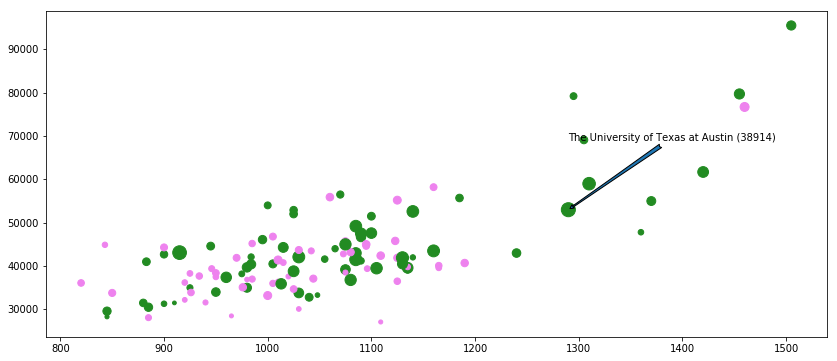

In [22]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter('sat_total', 'md_earn_wne_p10', data=college_samp, c='color', s='size')
max_ugds = int(college_samp['ugds'].max())
school_size = max_school + f' ({max_ugds})'
ax.annotate(school_size, xy=(x, y), xytext=(x, y * 1.3), arrowprops={'arrowstyle': 'fancy'})

### Problem 4
<span  style="color:green; font-size:16px">Read in the employee dataset and select the `salary` column as a Series, drop the missing values, and assign it to a variable. Read about the `pd.cut` function and create categories that span 25k from 0 to 300k. Save this result as a Series and find the frequency of each category. Then take that result and create a `pie` chart with labels.</span>

In [23]:
emp = pd.read_csv('../data/employee.csv', parse_dates=['hire_date', 'job_date'])
emp.head()

,title,dept,salary,race,gender,hire_date,job_date
0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic,Female,2006-06-12,2012-10-13
1,LIBRARY ASSISTANT,Library,26125.0,Hispanic,Female,2000-07-19,2010-09-18
2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Male,2015-02-03,2015-02-03
3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Male,1982-02-08,1991-05-25
4,ELECTRICIAN,General Services Department,56347.0,White,Male,1989-06-19,1994-10-22


In [24]:
s = pd.cut(emp['salary'], bins=range(0, 300000, 25000))
df_cat = s.value_counts().reset_index()
df_cat.columns = ['Salary Range', 'Count']
df_cat

,Salary Range,Count
0,"(50000, 75000]",816
1,"(25000, 50000]",804
2,"(75000, 100000]",208
3,"(100000, 125000]",37
4,"(125000, 150000]",10
5,"(175000, 200000]",4
6,"(150000, 175000]",4
7,"(250000, 275000]",1
8,"(200000, 225000]",1
9,"(0, 25000]",1


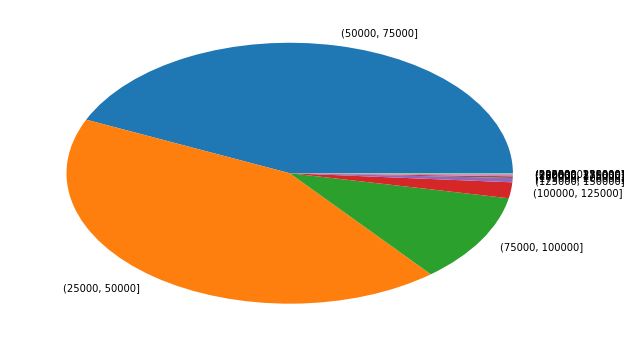

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie('Count', labels='Salary Range', data=df_cat);

# 03. Plotting with Pandas

### Problem 1
<span  style="color:green; font-size:16px">In this problem we will test whether daily returns from stocks are normally distributed. Complete the following tasks:
* Take the `df_stocks` DataFrame and call the **`pct_change`** method to get the daily return percentage and assign it to a variable. 
* Assign the mean and standard deviation of each column (these will return Series) to separate variables. 
* Standardize your columns by subtracting the mean and dividing by the standard deviation. You have now produced a **z-score** for each daily return. 
* Add a column to this DataFrame called **`noise`** by calling **`np.random.randn`** which creates random normal variables.
* Plot the KDE for each column in your DataFrame. If the stock returns are normal, then the shapes of the curves will all look the same.
* Limit the xaxis to be between -3 and 3.
* Are stock retunrs normally distributed?</span>

In [26]:
import requests

In [27]:
symbols = ['AMZN', 'AAPL', 'FB', 'SLB', 'TSLA']
stock_dict = {}
for symbol in symbols:
    req = requests.get(f'https://api.iextrading.com/1.0/stock/{symbol}/chart/5y')
    stock = pd.read_json(req.text).set_index('date')
    stock_dict[symbol] = stock['close']
df_stocks = pd.DataFrame(stock_dict)

In [28]:
df_stocks.head()

,AMZN,AAPL,FB,SLB,TSLA
date,,,,,
2013-09-12,298.860,61.8298,44.75,76.6536,164.930
2013-09-13,297.920,60.8108,44.31,76.7776,165.540
2013-09-16,296.060,58.8776,42.51,77.0255,166.580
2013-09-17,304.170,59.5577,45.07,77.6806,166.230
2013-09-18,312.034,60.7821,45.23,78.7519,166.218


In [30]:
stock_pct_change = df_stocks.pct_change()
stock_pct_change.head()

,AMZN,AAPL,FB,SLB,TSLA
date,,,,,
2013-09-12,NaN,NaN,NaN,NaN,NaN
2013-09-13,-0.003145,-0.016481,-0.009832,0.001618,0.003699
2013-09-16,-0.006243,-0.031790,-0.040623,0.003229,0.006282
2013-09-17,0.027393,0.011551,0.060221,0.008505,-0.002101
2013-09-18,0.025854,0.020558,0.003550,0.013791,-0.000072


In [31]:
mean = stock_pct_change.mean()
std = stock_pct_change.std()
stock_normal = (stock_pct_change - mean) / std
stock_normal['noise'] = np.random.randn(len(df_stocks))
stock_normal.head()

,AMZN,AAPL,FB,SLB,TSLA,noise
date,,,,,,
2013-09-12,NaN,NaN,NaN,NaN,NaN,0.498583
2013-09-13,-0.262271,-1.230194,-0.584654,0.110461,0.103457,1.436176
2013-09-16,-0.430849,-2.299926,-2.213186,0.215705,0.195925,-0.692860
2013-09-17,1.399483,0.728471,3.120530,0.560356,-0.104089,-0.056604
2013-09-18,1.315731,1.357826,0.123153,0.905657,-0.031482,0.421605


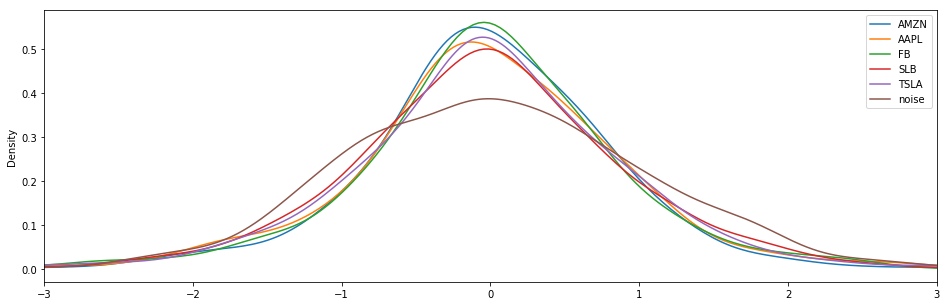

In [32]:
stock_normal.plot(kind='kde', xlim=[-3, 3], figsize=(16, 5))

No, There is quite a bit more area under the curve between -1 and 1 standard deviations. Also, there is a lot more are outside of 3 standard deviations (can't see this from the graph).

### Problem 2
<span  style="color:green; font-size:16px">Use Pandas to plot a horizontal bar plot of diamond cuts.</span>

In [33]:
diamonds = pd.read_csv('../data/diamonds.csv')
diamonds.head(10)

,shape,carat,cut,color,clarity,table,depth,cert,price,x,y,z
0,Round,2.01,Ideal,G,IF,58.0,62.0,GIA,8587270,8.09,8.02,5.00
1,Emerald,20.28,Ideal,D,FL,67.0,60.9,GIA,3046290,17.32,14.50,8.83
2,Emerald,20.28,V.Good,D,FL,67.0,60.9,GIA,2980508,17.32,14.50,8.83
3,Round,20.32,Ideal,F,VVS1,55.0,61.6,GIA,2723138,17.64,17.55,10.83
4,Round,20.25,Ideal,D,VVS1,58.0,60.1,GIA,2693429,17.61,17.72,10.61
5,Round,20.25,Ideal,D,VVS1,58.0,60.1,GIA,2679980,17.72,17.61,10.61
6,Emerald,25.06,Ideal,F,VVS1,60.0,67.8,GIA,2236700,19.26,14.14,9.59
7,Emerald,25.06,Ideal,F,VVS1,60.0,67.8,GIA,2187116,19.26,14.14,9.59
8,Round,17.57,Ideal,E,FL,56.0,61.8,GIA,2031650,16.78,16.73,10.36
9,Round,20.25,Ideal,F,FL,57.0,61.1,GIA,2026690,17.68,17.57,10.76


In [34]:
cut_count = diamonds['cut'].value_counts()
cut_count

Ideal     28987
V.Good     8870
Good       2143
Name: cut, dtype: int64

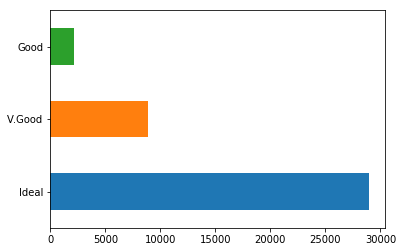

In [35]:
cut_count.plot(kind='barh')

In [36]:
plt.style.use(['ggplot'])

### Problem 3
<span  style="color:green; font-size:16px">Make a visualization that easily shows the differences in average salary by gender for each department of the employee dataset.</span>

In [38]:
emp = pd.read_csv('../data/employee.csv', parse_dates=['hire_date', 'job_date'])
emp.head()

,title,dept,salary,race,gender,hire_date,job_date
0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic,Female,2006-06-12,2012-10-13
1,LIBRARY ASSISTANT,Library,26125.0,Hispanic,Female,2000-07-19,2010-09-18
2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Male,2015-02-03,2015-02-03
3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Male,1982-02-08,1991-05-25
4,ELECTRICIAN,General Services Department,56347.0,White,Male,1989-06-19,1994-10-22


In [39]:
dept_gender_sal = emp.pivot_table(index='dept', columns='gender', values='salary')
dept_gender_sal.head()

gender,Female,Male
dept,,
Admn. & Regulatory Affairs,48758.181818,57592.285714
City Controller's Office,58979.500000,42640.000000
City Council,59260.000000,58491.500000
Convention and Entertainment,38397.000000,NaN
Dept of Neighborhoods (DON),50577.500000,43995.444444


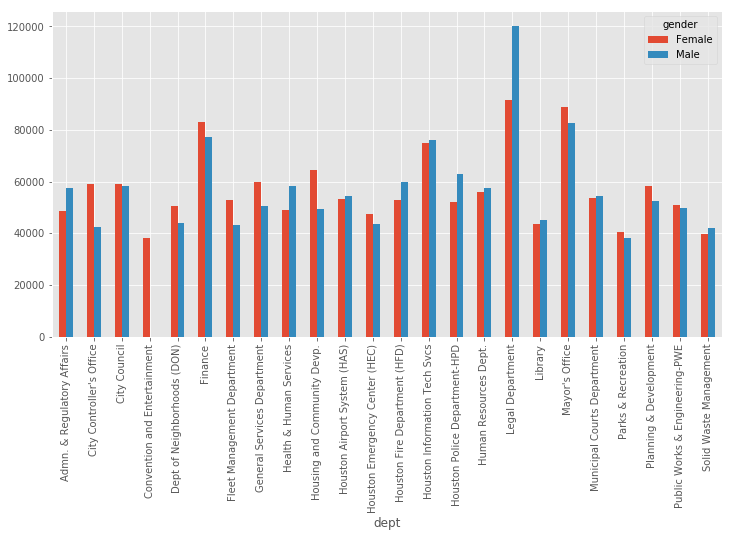

In [40]:
dept_gender_sal.plot(kind='bar', figsize=(12, 6))

### Problem 4
<span  style="color:green; font-size:16px">Split the employee data into two separate DataFrames. Those who have a hire date after the year 2000 and those who have one before. Make the same plot above for each group.</span>

In [41]:
criteria = emp['hire_date'].dt.year >= 2000

In [42]:
emp_2000_and_later = emp[criteria]
emp_2000_and_later.head()

,title,dept,salary,race,gender,hire_date,job_date
0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic,Female,2006-06-12,2012-10-13
1,LIBRARY ASSISTANT,Library,26125.0,Hispanic,Female,2000-07-19,2010-09-18
2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Male,2015-02-03,2015-02-03
6,ENGINEER,Public Works & Engineering-PWE,71680.0,Asian,Male,2012-03-26,2012-03-26
7,CARPENTER,Houston Airport System (HAS),42390.0,White,Male,2013-11-04,2013-11-04


In [43]:
dept_gender_sal_2000_and_later =  emp_2000_and_later.pivot_table(index='dept', 
                                                                 columns='gender', 
                                                                 values='salary')
dept_gender_sal_2000_and_later.head()

gender,Female,Male
dept,,
Admn. & Regulatory Affairs,48154.777778,57592.285714
City Controller's Office,57306.500000,42640.000000
City Council,59260.000000,58491.500000
Convention and Entertainment,38397.000000,NaN
Dept of Neighborhoods (DON),51124.000000,34245.200000


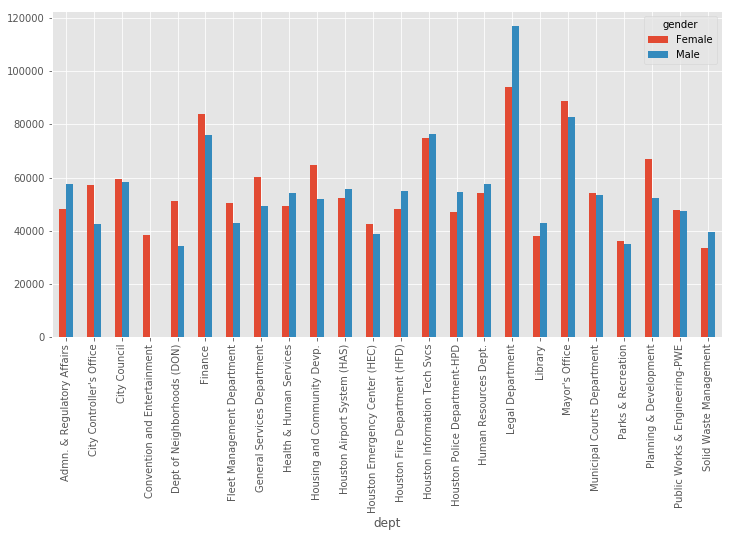

In [44]:
dept_gender_sal_2000_and_later.plot(kind='bar', figsize=(12, 6))

In [45]:
emp_before_2000 = emp[~criteria]
emp_before_2000.head()

,title,dept,salary,race,gender,hire_date,job_date
3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Male,1982-02-08,1991-05-25
4,ELECTRICIAN,General Services Department,56347.0,White,Male,1989-06-19,1994-10-22
5,SENIOR POLICE OFFICER,Houston Police Department-HPD,66614.0,Black,Male,1984-11-26,2005-03-26
8,DEPUTY ASSISTANT DIRECTOR (EXECUTIVE LEV,Public Works & Engineering-PWE,107962.0,White,Male,1993-11-15,2013-01-05
11,"CHIEF PHYSICIAN,MD",Health & Human Services,180416.0,Black,Male,1987-05-22,1999-08-28


In [46]:
dept_gender_sal_before_2000 =  emp_before_2000.pivot_table(index='dept', 
                                                                 columns='gender', 
                                                                 values='salary')
dept_gender_sal_before_2000.head()

gender,Female,Male
dept,,
Admn. & Regulatory Affairs,51473.5,NaN
City Controller's Office,60652.5,NaN
Dept of Neighborhoods (DON),50031.0,56183.250000
Finance,81458.0,78395.333333
Fleet Management Department,54363.5,43730.777778


Can drop missing values so that we can compare

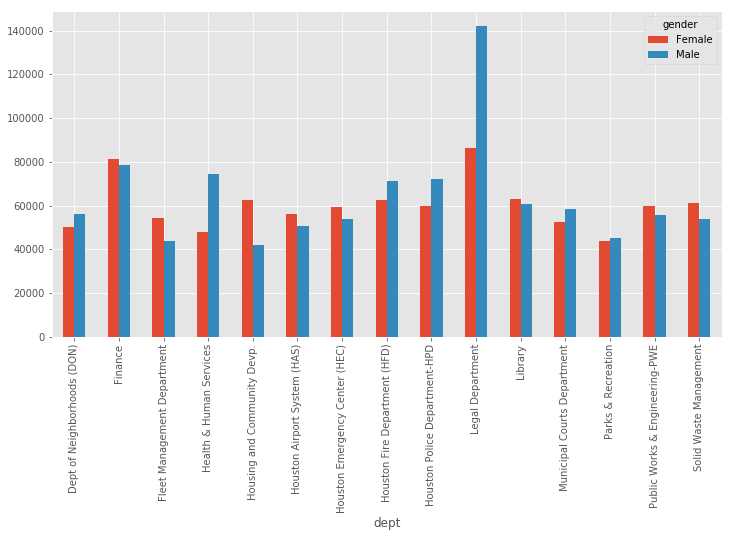

In [47]:
dept_gender_sal_before_2000.dropna().plot(kind='bar', figsize=(12, 6))

In [49]:
flights = pd.read_csv('../data/flights.csv')
pd.options.display.max_columns = 40
flights.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,WN,1908,N8324A,LAX,SLC,1625,1723.0,58.0,10.0,1733.0,100.0,107.0,94.0,590,2007.0,3.0,1905,2010.0,65.0,0,0,NaN,31.0,0.0,0.0,34.0,0.0
1,2015,1,1,4,UA,581,N448UA,DEN,IAD,823,830.0,7.0,11.0,841.0,190.0,170.0,154.0,1452,1315.0,5.0,1333,1320.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,MQ,2851,N645MQ,DFW,VPS,1305,1341.0,36.0,18.0,1359.0,108.0,107.0,85.0,641,1524.0,4.0,1453,1528.0,35.0,0,0,NaN,0.0,0.0,35.0,0.0,0.0
3,2015,1,1,4,AA,383,N3EUAA,DFW,DCA,1555,1602.0,7.0,13.0,1615.0,160.0,146.0,126.0,1192,1921.0,7.0,1935,1928.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,WN,3047,N560WN,LAX,MCI,1720,1808.0,48.0,6.0,1814.0,185.0,176.0,166.0,1363,2300.0,4.0,2225,2304.0,39.0,0,0,NaN,0.0,0.0,17.0,22.0,0.0


### Problem 5
<span  style="color:green; font-size:16px">Use the **`flights`** data set. Plot the counts of the number of flights per day of week.</span>

In [50]:
weekday_ct = flights['day_of_week'].value_counts()
weekday_ct

1    8720
3    8706
4    8659
2    8535
5    8453
7    8367
6    7052
Name: day_of_week, dtype: int64

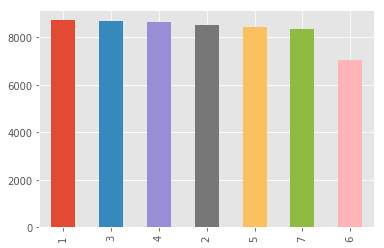

In [51]:
weekday_ct.plot(kind='bar')

### Problem 6
<span  style="color:green; font-size:16px">Plot the average arrival delay per day of week.</span>

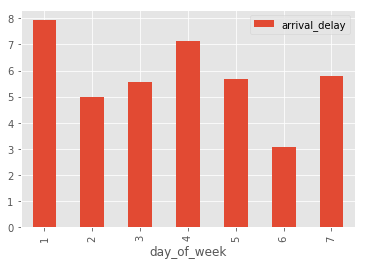

In [52]:
flights.groupby('day_of_week').agg({'arrival_delay': 'mean'}).plot(kind='bar')

### Problem 7
<span  style="color:green; font-size:16px">Plot the average arrival delay per day of week per airline.</span>

In [53]:
airline_weekday_delay = flights.pivot_table(index='airline', 
                                            columns='day_of_week', 
                                            values='arrival_delay')
airline_weekday_delay

day_of_week,1,2,3,4,5,6,7
airline,,,,,,,
AA,9.135772,3.009053,2.979561,6.474771,6.743017,5.720548,4.869800
AS,1.152542,-3.783019,-3.782609,5.181818,-1.284404,-2.650485,-0.906542
B6,11.057143,9.474359,3.564103,13.678571,4.285714,4.966102,12.655172
DL,1.155868,1.126724,1.097608,2.990266,-0.352122,-1.681672,-2.409091
EV,11.133570,5.327869,7.584706,8.237736,5.910412,2.711816,7.628606
F9,14.464481,15.037838,16.015707,11.758065,14.948187,10.709497,12.292553
HA,11.421053,20.166667,2.947368,4.666667,-3.727273,-3.250000,-4.352941
MQ,6.749460,5.910180,8.546906,7.345725,8.973251,0.190883,8.413502
NK,16.536842,13.986667,13.480952,19.892857,23.160173,17.780612,23.738095


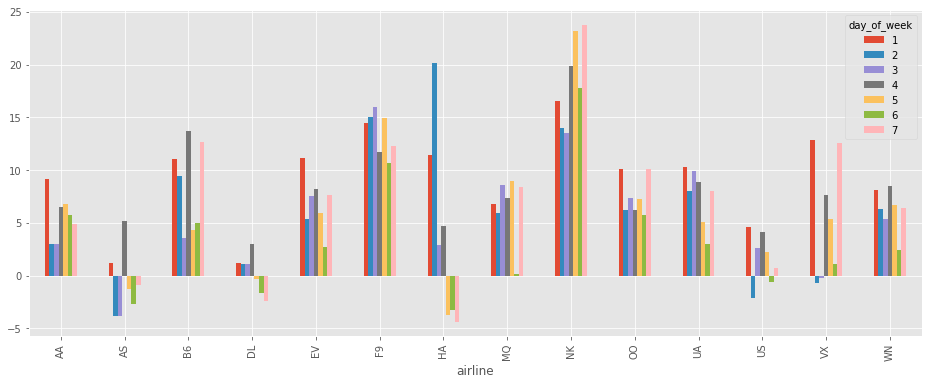

In [54]:
airline_weekday_delay.plot(kind='bar', figsize=(16,6))

# 4. Seaborn

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

college = pd.read_csv('../data/college.csv')
tips = sns.load_dataset('tips')

### Problem 1
<span  style="color:green; font-size:16px">Using Seaborn, plot the number of schools per state.</span>

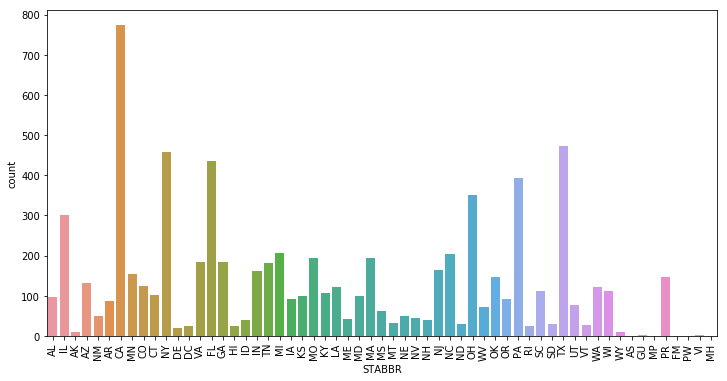

In [150]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot('STABBR', data=college, ax=ax)
ax.tick_params(axis='x', rotation=90)

### Problem 2
<span  style="color:green; font-size:16px">Use pandas to create the same plot from problem 1, but make it an ordered horizontal bar chart.</span>

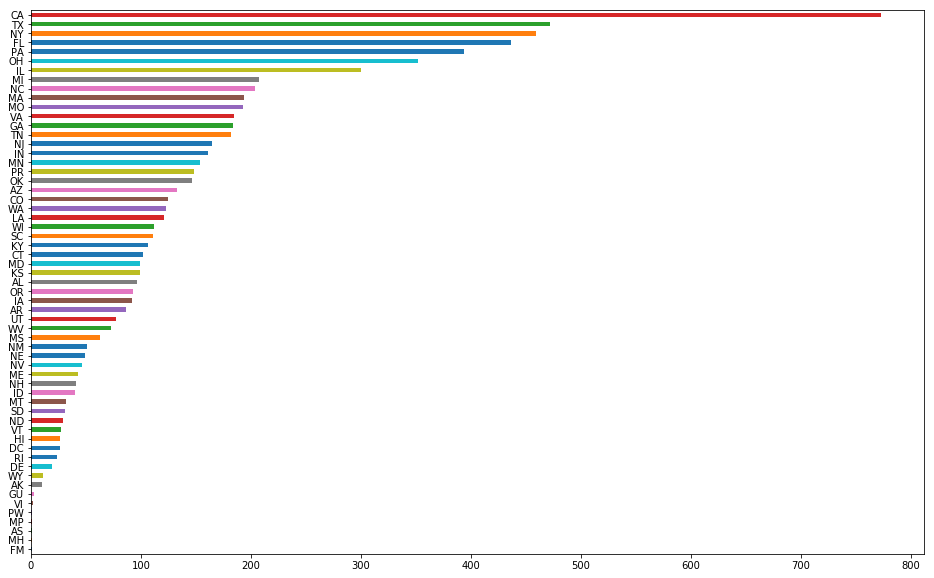

In [151]:
college['STABBR'].value_counts(ascending=True).plot(kind='barh', figsize=(16,10))

### Problem 3
<span  style="color:green; font-size:16px">Make a boxplot per state of SAT Math.</span>

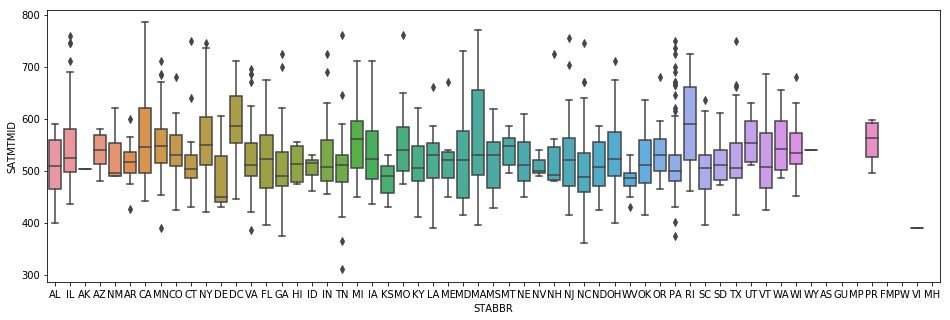

In [155]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(x='STABBR', y='SATMTMID', data=college, ax=ax)

### Problem 4
<span  style="color:green; font-size:16px">Draw the relationship between SAT Math and Verbal scores with a regression line.</span>

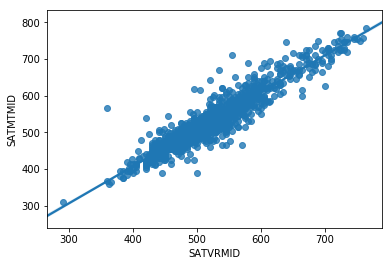

In [158]:
sns.regplot(x='SATVRMID', y='SATMTMID', data=college)